In [94]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import rasterio
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
train_csv_path = '/datasets/rpartsey/satellite/planet/csv/classification/train.csv'
val_csv_path = '/datasets/rpartsey/satellite/planet/csv/classification/val.csv'

In [3]:
df = pd.read_csv(train_csv_path)

In [4]:
df.head()

,image_path,label
0,/datasets/rpartsey/satellite/planet/2017-su-au...,1
1,/datasets/rpartsey/satellite/planet/2017-su-au...,0
2,/datasets/rpartsey/satellite/planet/2017-su-au...,0
3,/datasets/rpartsey/satellite/planet/2017-su-au...,1
4,/datasets/rpartsey/satellite/planet/2017-su-au...,0


In [5]:
df.iloc[0,0]

'/datasets/rpartsey/satellite/planet/2017-su-au-1_2017-sp-1_2017-sp-2_256x256/images/20170330_075416_0e2f_3B_AnalyticMS_6_6_spring.tif'

In [6]:
df['mask_path'] = df['image_path'].map(lambda path: path.replace('images', 'masks'))

In [95]:
df = df[['image_path', 'mask_path', 'label']]
df.head()

,image_path,mask_path,label
0,/datasets/rpartsey/satellite/planet/2017-su-au...,/datasets/rpartsey/satellite/planet/2017-su-au...,1
1,/datasets/rpartsey/satellite/planet/2017-su-au...,/datasets/rpartsey/satellite/planet/2017-su-au...,0
2,/datasets/rpartsey/satellite/planet/2017-su-au...,/datasets/rpartsey/satellite/planet/2017-su-au...,0
3,/datasets/rpartsey/satellite/planet/2017-su-au...,/datasets/rpartsey/satellite/planet/2017-su-au...,1
4,/datasets/rpartsey/satellite/planet/2017-su-au...,/datasets/rpartsey/satellite/planet/2017-su-au...,0


In [130]:
def read_tif(path, *args, **kwargs):
    """
    Args:
        path (string): Path to the tif file.

    Returns:
        numpy.ndarray: Numpy array of shape (CxHxW)
    """
    with rasterio.open(path) as source:
        bands = source.read()
        return bands
    
    
def visualize(*images, **configs):
    figsize = configs.get('figsize') or (5, 5)
    titles = configs.get('titles') or [None] * len(images)
    plot_params = configs['plot_params']
    
    fig, axes = plt.subplots(1, len(images), figsize=figsize)

    for ax, image, title, params in zip(axes, images, titles, plot_params):
        ax.axis('off')
        ax.set_title(title)
        ax.imshow(image, **params)
    
    plt.show()

Burned area


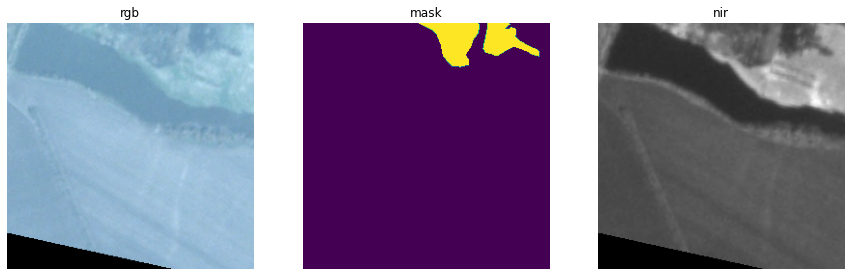

Burned area


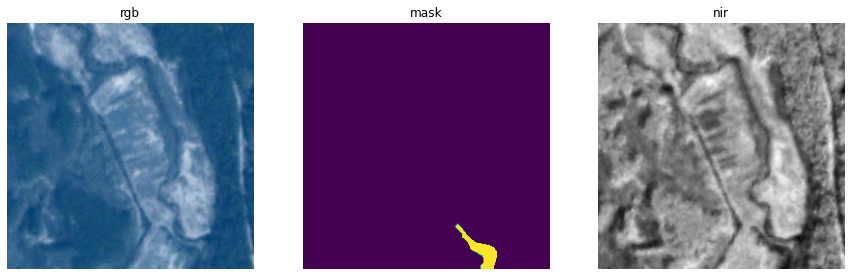

no burned area


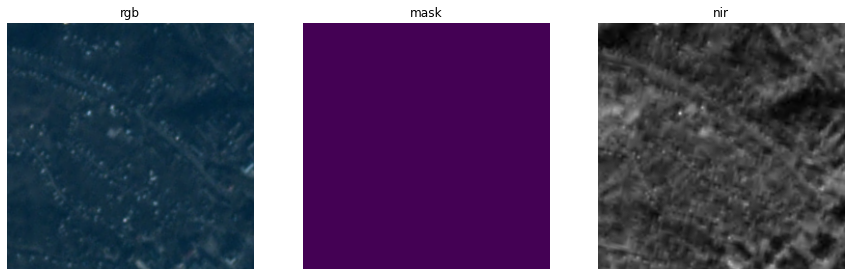

no burned area


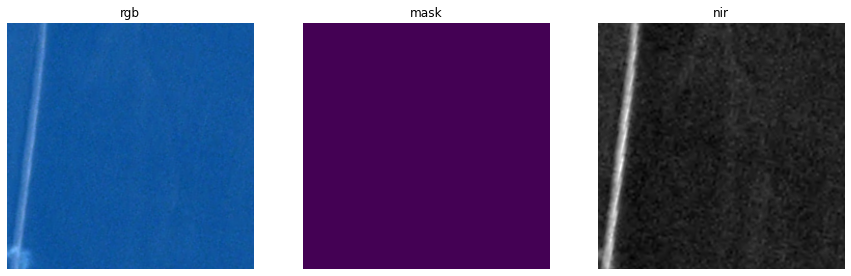

Burned area


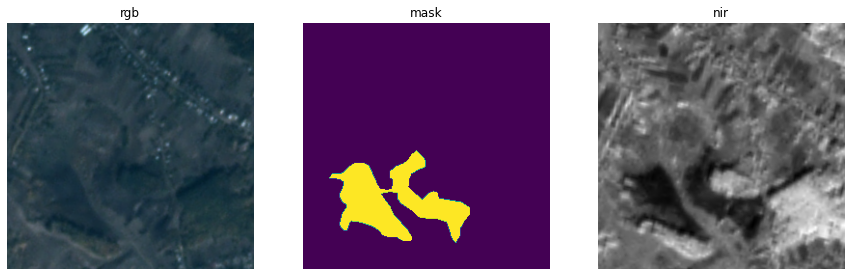

Burned area


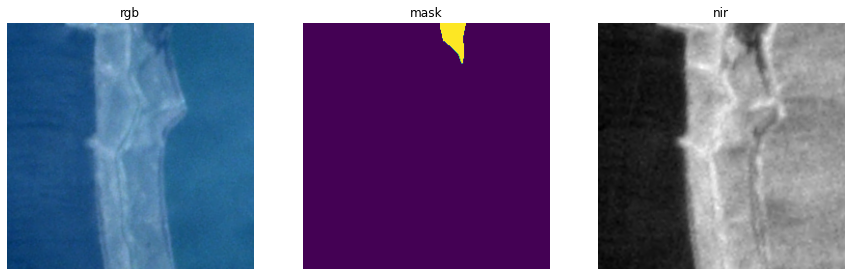

Burned area


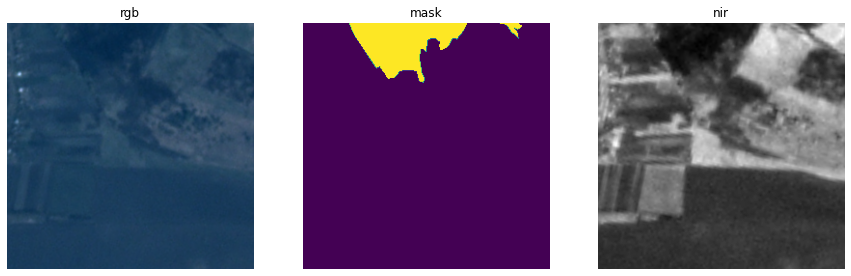

no burned area


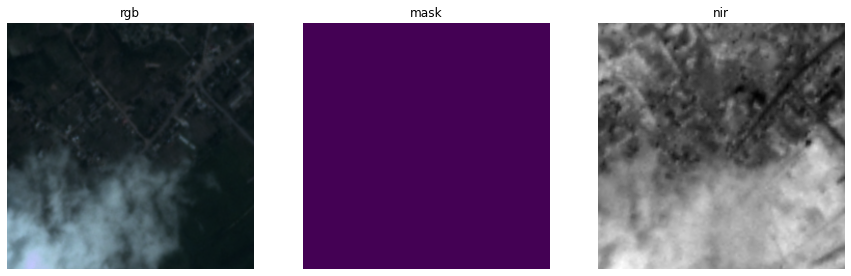

Burned area


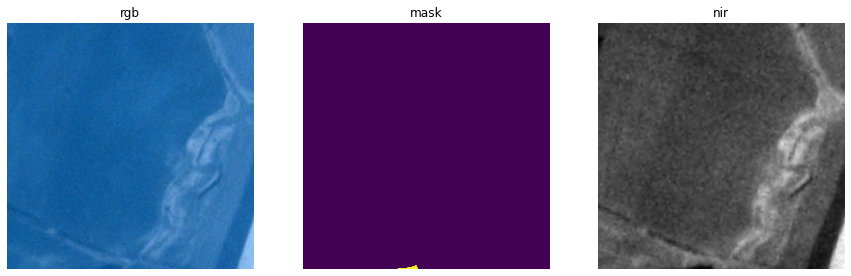

no burned area


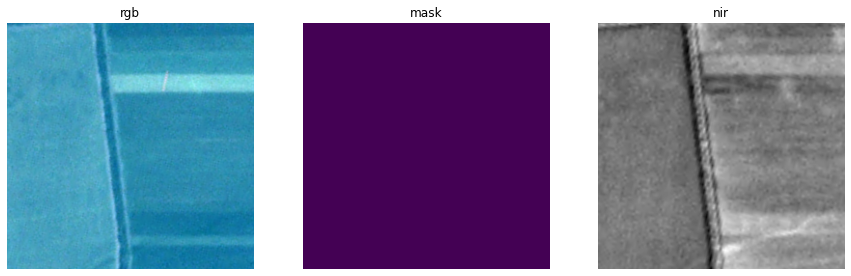

Burned area


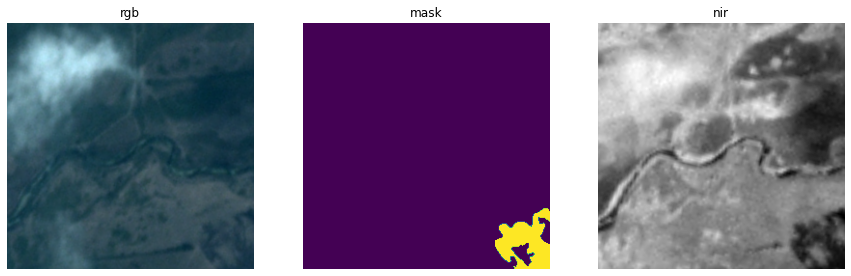

Burned area


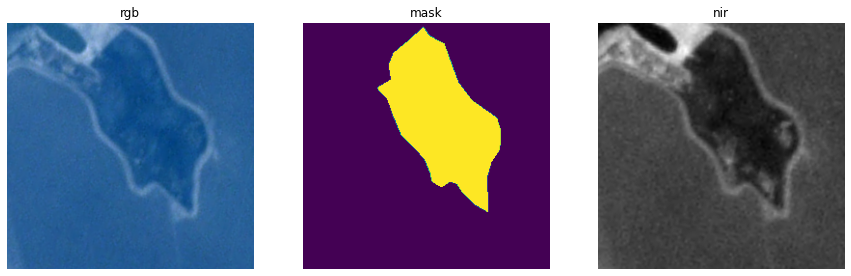

Burned area


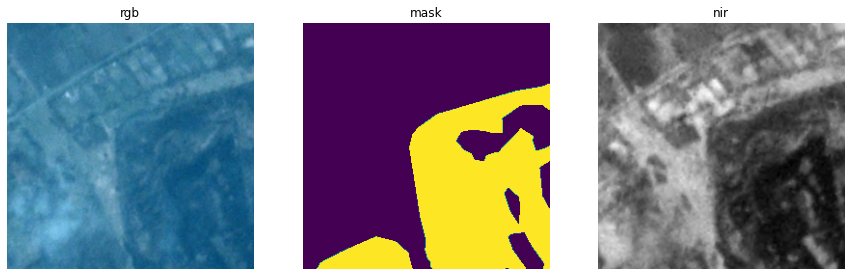

Burned area


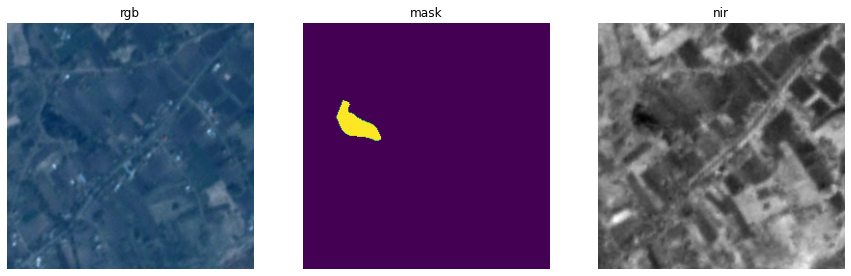

Burned area


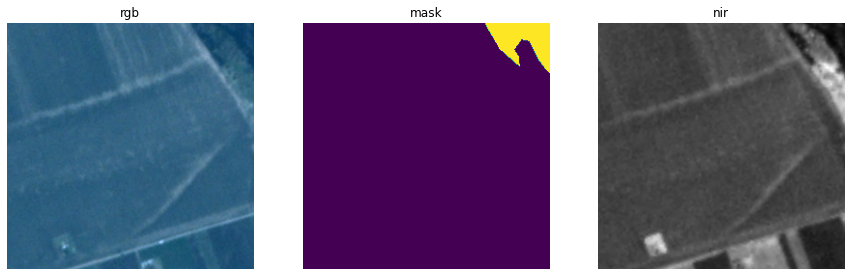

no burned area


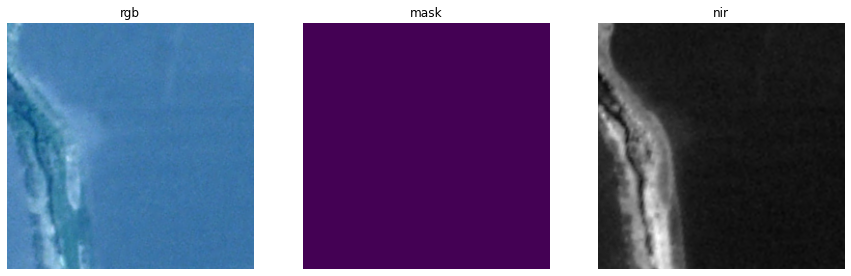

no burned area


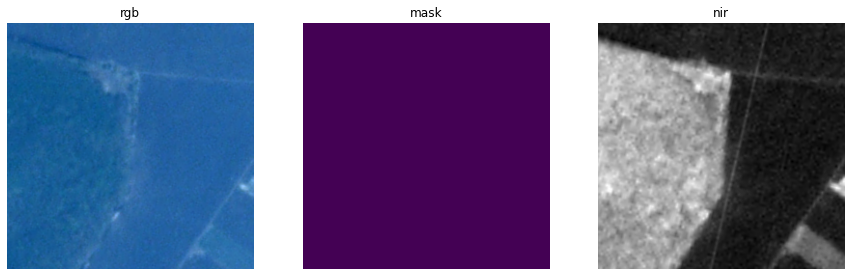

no burned area


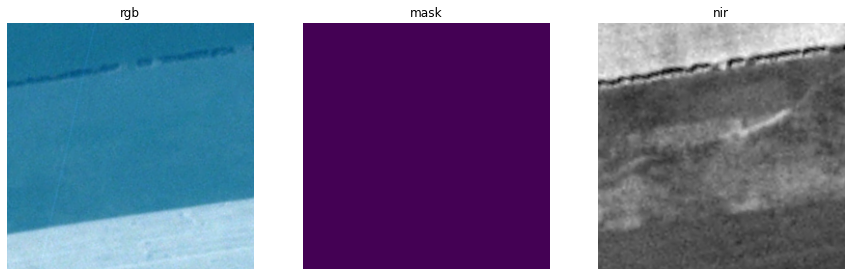

Burned area


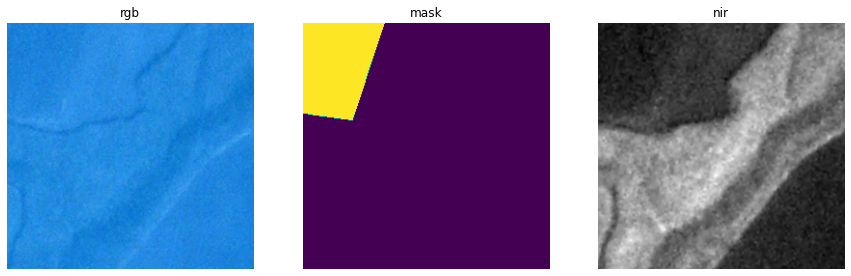

no burned area


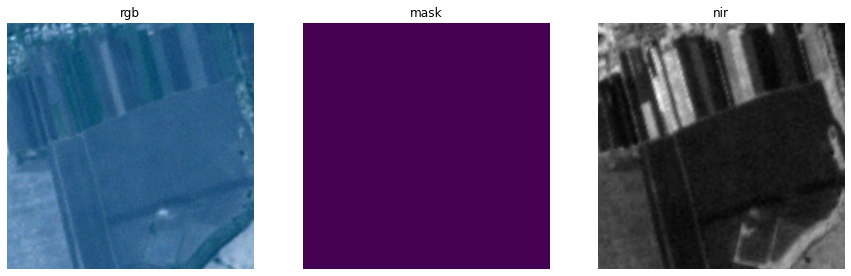

In [137]:
for index, row in df[20:40].iterrows():
    image_path, mask_path, label = row
    
    tif_image = read_tif(image_path)  # uint16
    tif_mask = read_tif(mask_path)  # uint8
    
    b, g, r, nir = tif_image
    mask = tif_mask[0]
    
    rgb = np.array([r, g, b]).transpose((1, 2, 0))
    rgb = cv2.normalize(rgb, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    nir = cv2.normalize(nir, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    
    print('Burned area' if label else 'no burned area')
    visualize(
        *[np.clip(image, 0, 1) for image in [rgb, mask, nir]],
        titles=['rgb', 'mask', 'nir'],
        plot_params=[{}, {}, {'cmap': 'gray'}],
        figsize=(15, 5)
    ) 